In [40]:
import pickle
from quippy.descriptors import Descriptor
from ase.io import read
import numpy as np
from sklearn.model_selection import train_test_split
#The Gaussian model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
# the KRR model
from sklearn.kernel_ridge import KernelRidge

from rdkit import Chem
from rdkit.Chem import AllChem

import sklearn
model = pickle.load(open('XPS_GPR_C1s.pkl', 'rb'))


In [43]:
molAll = read('data/all_QM9.xyz', index=':')
Z = 6 # compute environment around atoms of a given Z. Here C atoms
descriptor = Descriptor("soap atom_sigma=0.5 n_max=3 l_max=3 cutoff=3.0 Z={:d} n_species=3 species_Z='1 6 8'".format(Z))

def smiles_to_xyz(smiles):
# smiles to mol
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    Chem.MolToMolFile(mol, 'temp.mol')    # Write RDKit molecule to a temporary file
    molecule = read('temp.mol') # Read the temporary file into ASE Atoms object
    return molecule

In [47]:
smiles = 'CC'
xyz = smiles_to_xyz(smiles)
print(xyz)

Atoms(symbols='C2H6', pbc=False)


In [51]:
def xyz_to_X(mol):
    elements = []
    if ("C" in mol.symbols) == True:
        descMol = descriptor.calc(mol) #descriptor for each molecule

        if 'data' in descMol:
           desc_data = descMol['data'] #get the data from the descriptor object if exist
           print(len(desc_data))
           for element in desc_data:
               elements.append(element)
    return elements
X = xyz_to_X(xyz)
print(X)

2
[array([ 3.57029012e-02,  1.45794393e-04,  8.77649813e-05,  5.12363525e-05,
        1.65555170e-01,  8.28989387e-03,  4.99033213e-03,  2.91330635e-03,
        3.83841555e-01,  2.35682385e-01,  1.41875578e-01,  8.28255085e-02,
       -1.60535186e-05, -3.43405715e-07, -1.70630460e-07, -2.32443971e-07,
       -5.26374058e-05, -1.38070412e-05, -6.86040166e-06, -9.34568161e-06,
        3.60916692e-09,  4.94796851e-10,  3.59005603e-10,  8.54467893e-10,
        1.92545420e-01,  5.49372663e-05,  4.10882531e-05,  2.46767142e-05,
        6.31331465e-01,  2.20881937e-03,  1.65200319e-03,  9.92156926e-04,
       -6.12188157e-05, -8.89788616e-08, -5.19040548e-08, -6.29346621e-08,
        5.19197847e-01,  1.03864501e-05,  9.67918597e-06,  7.04494955e-06,
        2.85497380e-02,  2.20881451e-03,  1.65199938e-03,  9.92155019e-04,
        9.36108887e-02,  8.88080645e-02,  6.64206442e-02,  3.98907839e-02,
       -9.07724082e-06, -3.57749510e-06, -2.08686084e-06, -2.53035880e-06,
        1.08872154e-01

In [54]:
y = model.predict(X)
print(y)

[290.64905983 290.61244776]


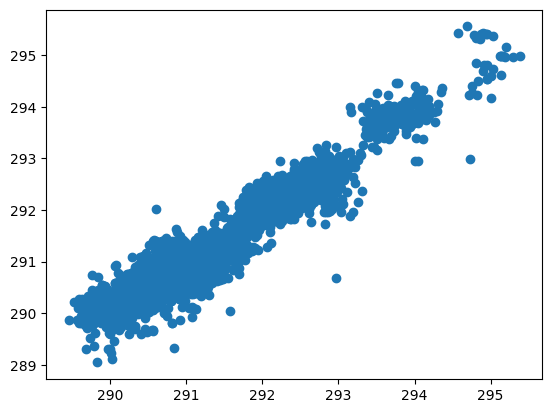

In [38]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y)
plt.show()

